# Nearest-Neighbor Methods

This is a python implementation of the Nearest-Neighbor algorithms presented in Section 2.3.2.

First, let's define the notations used in this example:
   * $\mathbf{X}$ is a matrix of inputs with size $N \times p$, where $N$ is the number of obervations and $p$ is the number of columns/ features / dimension.
   
       * Note that
       
       $$\mathbf{X} = \begin{bmatrix}x_{11} & x_{12} & \cdots & x_{1p} \\ x_{21} & x_{22} & \cdots & x_{2p} \\ \vdots & \cdots & \cdots & \vdots\\x_{N1} & \cdots & \cdots & x_{Np}\end{bmatrix}$$
       
       where $x_{ij}$ denotes the $i^{th}$ observation (row) of the $j^{th}$ feature of $\mathbf{X}$, $X_k$ denotes the $k^{th}$ column of $\mathbf{X}$ and $x_i$ denotes the $i^{th}$ row of $\mathbf{X}$.
       
   * $\mathbf{Y}$ is a matrix of outputs with size $N \times 1$.
   
   * $k$ denotes the number of nighborhood.
   
   * Any variables with $\hat{}$ on top  denote predicted / estimated variables.
   
   * $\mathbf{e}$ denotes a vector of ones with an appropriate size.

### Nearest-Neighbor Model
K-nearest neighbors model has the form:

$$\hat{\mathbf{Y}} = \frac{1}{k} \sum_{x_{i}\in N_k(\mathbf{X})} \mathbf{Y}_i$$

where $N_k(\mathbf{X})$ is the neighborhood of $\mathbf{X}$ defined by the $k$ closest points $x_{i}$ in the training sample.

From the above equation, there are **3 parts** we need to define/compute:

   * **Closeness of data points** (Euclidean distance as an example)
   * **Nearest neighboors of a data point**
   * **Prediction as given by the above equation**

These 3 parts are the main building blocks of nearest-neighbor algoritm. However, there are more advanced methods to compute each part.

### Python's implementation using Mixture dataset

Here, we'll try to implement the 3 parts of the algorithm from scratch.

In [15]:
# import necessary packages
import sys
import numpy as np
from ml_datasets.esl import Mixture
from ml_datasets.utils import plot_2D

In [16]:
# loading dataset
mixture = Mixture()
x, y = mixture.load()

Retrieving ESL-Mixture dataset...
C:\Users\mzyskk\AppData\Local\Temp\ESL\ESL.mixture.rda available locally, skip downloading


In [17]:
# check the input and output shapes
print("x: {}, y: {}".format(x.shape, y.shape))

x: (200, 2), y: (200,)


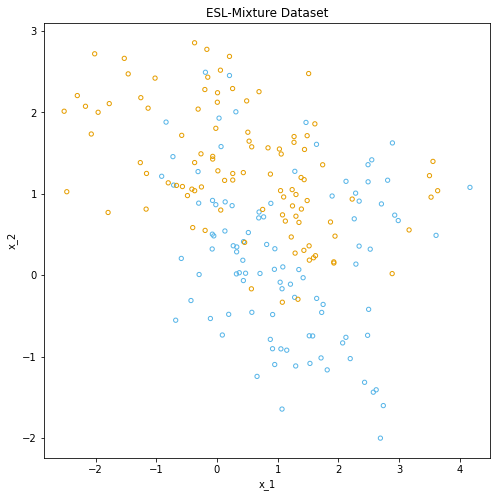

In [18]:
# visualize the data
plt = plot_2D(x, y, "ESL-Mixture Dataset", axis='on')

#### Part 1: Compute the closeness of data points
In this example, we use euclidean distance, which is defined as:

$$d(x_1, x_2) = d(x_2, x_1) = \sqrt{(x_{11} - x_{21}) ^ 2 + (x_{12} - x_{22}) ^ 2 + \cdots + (x_{1p} - x_{2p}) ^ 2}$$

The following method calculates this distance:

In [19]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum(np.square(x1 - x2)))

#### Part 2: Find the nearest neighboors of a data point

The following method locates the $k$ nearest of a data point using Euclidean distance. It returns $k$ indexes of training data points that are the closest to the data point of interest. 

In [20]:
def get_neighbor(i, x_row, x, num_neighbor=1):
    distance = np.zeros(x.shape[0])
    for j, x_ in enumerate(x):
        distance[j] = euclidean_distance(x_row, x_)

    return np.argsort(distance)[:num_neighbor]


#### Part 3: Compute the Prediction
After the first two parts are done, the prediction is then computed using the following equation:

$$\hat{\mathbf{Y}} = \frac{1}{k} \sum_{x_{i}\in N_k(\mathbf{X})} \mathbf{Y}_i$$

And the final classification output is given as:

$\hat{\mathbf{G}} = \begin{cases}
    \color{orange}{\text{ORANGE}} \color{black}{\text{ or 1}}, & \text{if } \hat{\mathbf{Y}} > 0.5\\
    \color{blue}{\text{BLUE}} \color{black}{\text{ or 0}},              & \text{if } \hat{\mathbf{Y}} \leq 0.5
\end{cases}$

The following method implements these equations:

In [21]:
def classify(x_test, x_train, y, num_neighbor=1, threshold=0.5):
    y_hat = np.zeros(x_test.shape[0]).astype(float)
    G_hat = np.zeros_like(y_hat).astype(int)
    for i, x_row in enumerate(x_test):
        index_neighbor = get_neighbor(i, x_row, x_train, num_neighbor=num_neighbor)

        y_hat[i] = (1.000 / num_neighbor) * np.sum(y[index_neighbor]).astype(float)

        if y_hat[i] > threshold:
            G_hat[i] = 1
        else:
            G_hat[i] = 0
    
    return G_hat

Since this algorithm is not a parametric model, i.e., there is no parameters to use to calculate the boundary equation, we need to generate some possible predictions in our input space and plot the contour of these predictions.

The next several lines of codes generate a grid of data points in the input space. 

In [22]:
# prepare data points for creating decision boundary
step = 0.05
x_1_range = np.arange(min(x[:, 0]), max(x[:, 0]), step)
x_2_range = np.arange(min(x[:, 1]), max(x[:, 1]), step)
x_1, x_2 = np.meshgrid(x_1_range,  x_2_range)
x_12 = np.concatenate((x_1.ravel().reshape(-1, 1), x_2.ravel().reshape(-1, 1)), axis=1)

When we are ready to show the classification results, we can use the following method to plot them.

In [23]:
# this method is used to plot the classification results (ground truth vs prediction and decision boundary)
def plot_classification(x, y, G_hat, Z, num_neighbor):
    BLUE, ORANGE = "#57B5E8", "#E69E00"
    plt.figure(figsize=(8, 8))
    plt.scatter(x[:, 0][y==1], x[:, 1][y==1], s=100, marker="o", edgecolors=ORANGE, facecolors="none", label='ground truth - class 1')
    plt.scatter(x[:, 0][y==0], x[:, 1][y==0], s=100, marker="o", edgecolors=BLUE, facecolors="none", label='ground truth - class 0')
    plt.scatter(x[:, 0][G_hat==1] + 0.03, x[:, 1][G_hat==1], s=100, marker="*", edgecolors=ORANGE, facecolors="none", label='prediction - class 1')
    plt.scatter(x[:, 0][G_hat==0] + 0.03, x[:, 1][G_hat==0], s=100, marker="*", edgecolors=BLUE, facecolors="none", label='prediction - class 0')
    plt.contour(x_1, x_2, Z.reshape(x_1.shape), colors="black", levels=[0])
    plt.legend()
    plt.title("{}-Nearest-Neighbor Classification".format(num_neighbor))
    plt.show()

#### Classification results using 15-nearest neighbors
The book shows some result using 15-nearest neighbors

In [24]:
num_neighbor = 15
threshold = 0.5
G_hat = classify(x, x, y, num_neighbor=num_neighbor, threshold=threshold)
Z = classify(x_12, x, y, num_neighbor=num_neighbor, threshold=threshold)
plot_classification(x, y, G_hat, Z, num_neighbor)

(13132,) (98, 134)


#### Classification results using 1-nearest neighbor
The book also shows some result using 1-nearest neighbor

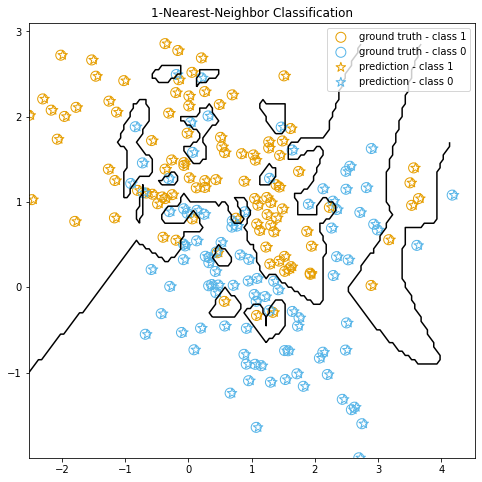

In [11]:
num_neighbor = 1
threshold = 0.5
G_hat = classify(x, x, y, num_neighbor=num_neighbor, threshold=threshold)
Z = classify(x_12, x, y, num_neighbor=num_neighbor, threshold=threshold)
plot_classification(x, y, G_hat, Z, num_neighbor)

#### NOTE
Here, we also added the predictions (as denoted by $\star$) in both plots.